In [28]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Oefening 1

In [3]:
# Haal de dataset op
bordeaux = pd.read_csv('datasets/bordeaux.csv', delimiter=';')

# Toon de eerste 10 items ter controle
display(bordeaux.head(10))

,year,temperature,sun,heat,rain,quality
0,1924,3064,1201,10,361,medium
1,1925,3000,1053,11,338,bad
2,1926,3155,1133,19,393,medium
3,1927,3085,970,4,467,bad
4,1928,3245,1258,36,294,good
5,1929,3267,1386,35,225,good
6,1930,3080,966,13,417,bad
7,1931,2974,1189,12,488,bad
8,1932,3038,1103,14,677,bad
9,1933,3318,1310,29,427,medium


Het aantal dimensies is: 2


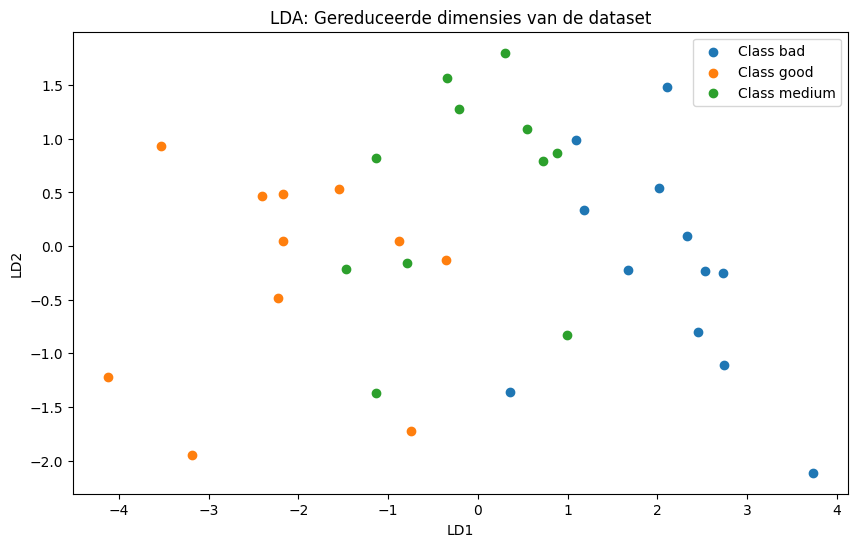

In [29]:
# Stel de onafhankelijke variabelen in
X = bordeaux[['temperature', 'sun', 'heat', 'rain']]

# Stel de afhankelijke variabelen in
y = bordeaux['quality']

# Pas de discriminantanalyse toe op deze dataset waarbij 
# quality afhankelijk is en temperature, sun, heat en 
# rain als onafhankelijke variabelen
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Hoeveel dimensies heeft de discrimantanalyse?

# - Aantal unieke klassen in de afhankelijke variabele
num_classes = y.nunique()

# - Aantal onafhankelijke variabelen
num_features = X.shape[1]

# Aantal dimensies
num_dimensions = min(num_classes - 1, num_features)
print(f"Het aantal dimensies is: {num_dimensions}")

# Transformeer de dataset naar de nieuwe dimensieruimte
lda_transformed = lda.transform(X)

# Maak een plot van de resultaten
plt.figure(figsize=(10, 6))
for label in sorted(y.unique()):  # Klassenlabels sorteren voor consistentie
    plt.scatter(
        lda_transformed[y == label, 0],
        lda_transformed[y == label, 1] if num_dimensions > 1 else [0] * sum(y == label),
        label=f'Class {label}'
    )

plt.xlabel('LD1')
if num_dimensions > 1:
    plt.ylabel('LD2')
plt.title('LDA: Gereduceerde dimensies van de dataset')
plt.legend()
plt.show()

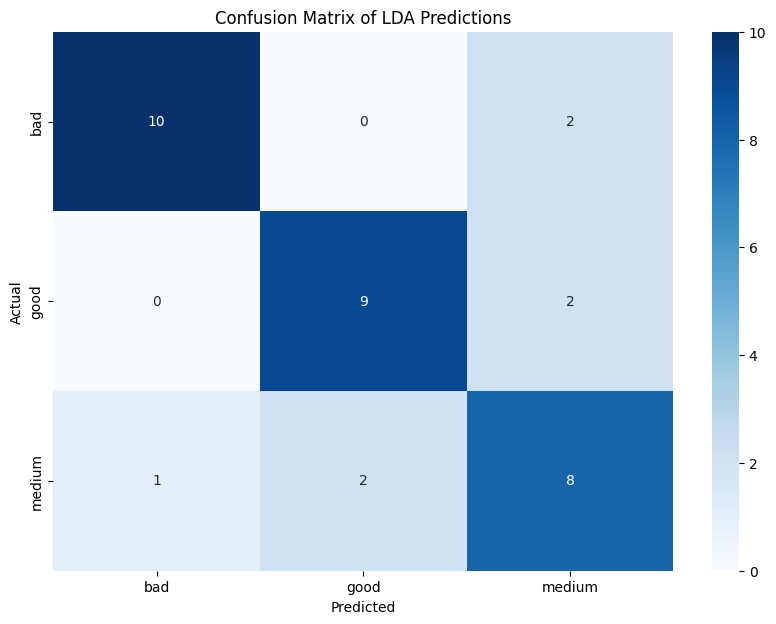

In [30]:
y_pred = lda.predict(X)

# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred, labels=lda.classes_)

# Plot the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LDA Predictions')
plt.show()

In [31]:
# Voorspel de labels op basis van de oorspronkelijke gegevens
predicted_labels = lda.predict(X)

# Bereken het percentage van wijnen met dezelfde label
accuracy = (y == predicted_labels).mean() * 100

print(f"Percentage van wijnen met dezelfde label als geobserveerd: {accuracy:.2f}%")

Percentage van wijnen met dezelfde label als geobserveerd: 79.41%


# Oefening 2

In [36]:
# Analyseer de type van gegevens in deze dataset
birthwt = pd.read_csv('datasets/birthwt.csv', delimiter=';')
birthwt.describe()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.312169,23.238095,129.814815,1.846561,0.391534,0.195767,0.063492,0.148148,0.793651,2944.587302
std,0.464609,5.298678,30.579380,0.918342,0.489390,0.493342,0.244494,0.356190,1.059286,729.214295
min,0.000000,14.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,0.000000,19.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,0.000000,23.000000,121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,1.000000,26.000000,140.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3487.000000
max,1.000000,45.000000,250.000000,3.000000,1.000000,3.000000,1.000000,1.000000,6.000000,4990.000000


In [37]:
birthwt.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


In [41]:
X = birthwt[['age', 'lwt', 'bwt']]
y = birthwt['smoke']

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [42]:
num_classes = y.nunique()
num_features = X.shape[1]

num_dimensions = min(num_classes - 1, num_features)
print(f"Het aantal dimensies is: {num_dimensions}, want de afhankelijke variabele heeft {num_classes} mogelijke waarden en er zijn {num_features} onafhankelijke variabelen. Dus N = min({num_classes} - 1, num_features = {num_dimensions})")

Het aantal dimensies is: 1, want de afhankelijke variabele heeft 2 mogelijke waarden en er zijn 3 onafhankelijke variabelen. Dus N = min(2 - 1, num_features = 1)


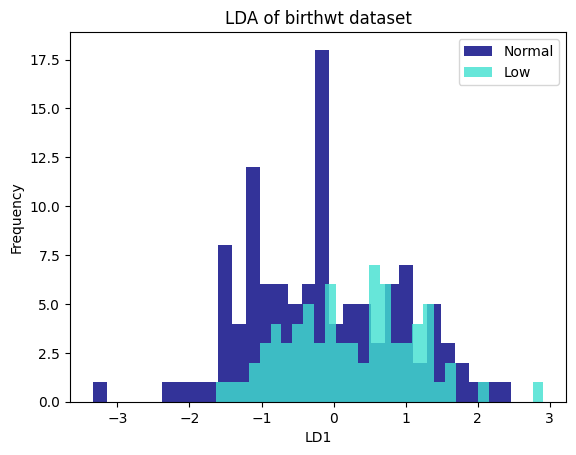

In [44]:
X_lda = lda.transform(X)

# Plot the results
plt.figure()
colors = ['navy', 'turquoise']

for i, color, target_name in zip([0, 1], colors, ['Normal', 'Low']):
    plt.hist(X_lda[y == i], alpha=0.8, color=color, label=target_name, bins=30)

plt.legend(loc='best', shadow=False)
plt.title('LDA of birthwt dataset')
plt.xlabel('LD1')
plt.ylabel('Frequency')
plt.show()

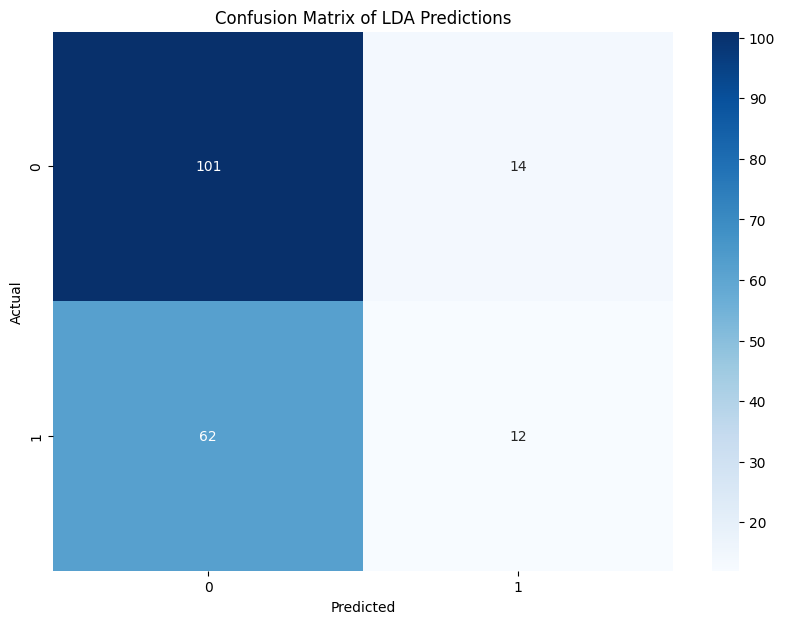

In [46]:
# Predict on the same dataset (since no train-test split was provided)
y_pred = lda.predict(X)

# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred, labels=lda.classes_)

# Plot the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LDA Predictions')
plt.show()

In [48]:
# Bereken het percentage van wijnen met dezelfde label
accuracy = (y == y_pred).mean() * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 59.79%


# Oefening 3

In [49]:
cars93 = pd.read_csv('datasets/cars93.csv', delimiter=';')
cars93.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


((90, 18), (90,)) ((3, 18), (3,))


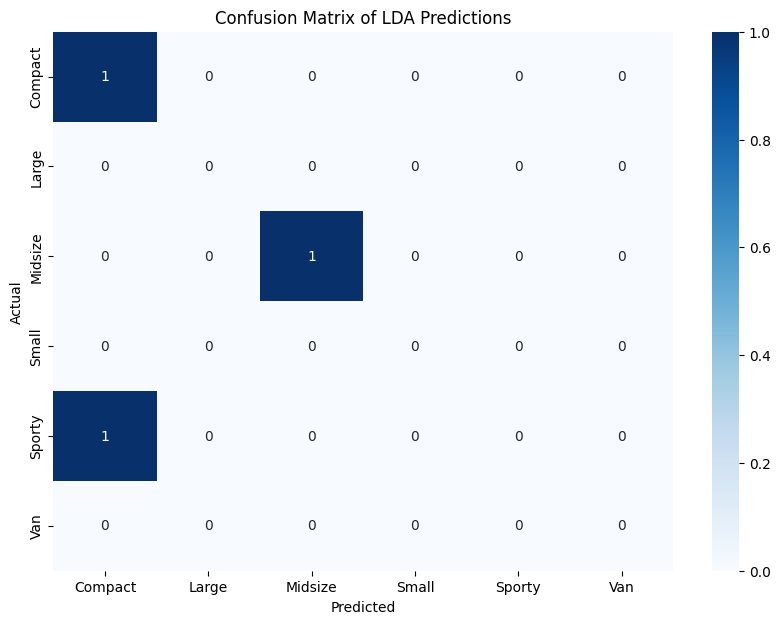

Accuracy: 66.67%
Dimensions: 1


In [53]:
# Data splitten in train & test data
train_data = cars93.iloc[:90]
test_data = cars93.iloc[-3:]

# Separate the features and target variable for training
X_train = train_data[
    ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
     'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
     'Luggage.room', 'Weight']]
y_train = train_data['Type']

# Separate the features and target variable for testing
X_test = test_data[
    ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
     'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
     'Luggage.room', 'Weight']]
y_test = test_data['Type']

# SHIT: Er ontbreken values (NaNs) in onze dataset. Dit accepteert LDA niet. Laten we dit fixen:

# Check for missing values
missing_values = X_train.isnull().sum()
# print(missing_values)

# Fill missing values with the median of the column
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Re-verify the shapes to ensure there are no missing values
print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

# LDA Toepassen
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # Trainen

# Predict on the test set
y_pred = lda.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=lda.classes_)

# Plot the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LDA Predictions')
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Dimensions: {num_dimensions}')